**TIP**
# Working with large Data

1. Take sample
2. Get familiar with data
3. Develop code that works with sample
4. Adapt the code to work with large or big data
5. Test with sample
6. Run code with bid data
7. Make it simplier with functions

# Exercise 2

**Top 10 arrival airports in the world in 2013 (using the bookings file)**

- To get the total number of passengers for an airport, you can sum the column `pax`, grouping by `arr_port`. Note that there is negative pax. That corresponds to cancelations. So to get the total number of passengers that have actually booked, you should sum including the negatives (that will remove the canceled bookings).
- Print the top 10 arrival airports in the standard output, including the number of passengers.
- **Bonus point**: Get the name of the city or airport corresponding to that airport (programatically, we suggest to have a look at **GeoBases in Github**)
- **Bonus point**: Solve this problem using pandas (instead of any other approach)

**First** take the path for read the file of `bookings.csv.bz2`

In [1]:
folder_path = 'C:/Users/Pablo Villar/Desktop/CURSOS/KSchool/Máster en Data Science/8. Data Science Challenge/'
filename01 = 'bookings.csv.bz2'
filename02 = 'searches.csv.bz2'

**Modules** that we will need to do this task
* Load modules and libraries

In [3]:
import pandas as pd
import numpy as np

Here the `pd.read_csv` help to fully explain what we're doing when loading the file.

[Docs pandas.read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)

In [52]:
pd.options.display.max_columns = None   # para que muestre el total de columnas
df_bookings_sample = pd.read_csv(folder_path+filename01,
                          compression='bz2', # we know it's compressed although read_csv can infer the compression type
                          sep='^', # the separator used on the data file
                          nrows=1e5 # start with a small sample of data
                          )
df_bookings_sample

,act_date,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,dep_port,dep_city,dep_ctry,arr_port,arr_city,arr_ctry,lst_port,lst_city,lst_ctry,brd_port,brd_city,brd_ctry,off_port,off_city,off_ctry,mkt_port,mkt_city,mkt_ctry,intl,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
0,2013-03-05 00:00:00,1A,DE,a68dd7ae953c8acfb187a1af2dcbe123,1a11ae49fcbf545fd2afc1a24d88d2b7,ea65900e72d71f4626378e2ebd298267,2013-02-22 00:00:00,1708,0,ZRH,ZRH,CH,LHR,LON,GB,ZRH,ZRH,CH,LHR,LON,GB,ZRH,ZRH,CH,LHRZRH,LONZRH,CHGB,1,LHRZRH,VI,T,Y,2013-03-07 08:50:00,2013-03-07 11:33:37,-1,2013,3,NULL
1,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,SAL,SV,CLT,CLT,US,SAL,SAL,SV,SAL,SAL,SV,CLT,CLT,US,CLTSAL,CLTSAL,SVUS,1,SALATLCLT,NV,L,Y,2013-04-12 13:04:00,2013-04-12 22:05:40,1,2013,3,NULL
2,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,SAL,SV,CLT,CLT,US,SAL,SAL,SV,CLT,CLT,US,SAL,SAL,SV,CLTSAL,CLTSAL,SVUS,1,CLTATLSAL,NV,U,Y,2013-07-15 07:00:00,2013-07-15 11:34:51,1,2013,3,NULL
3,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,AKL,NZ,SVO,MOW,RU,AKL,AKL,NZ,AKL,AKL,NZ,SVO,MOW,RU,AKLSVO,AKLMOW,NZRU,1,AKLHKGSVO,XK,G,Y,2013-04-24 23:59:00,2013-04-25 16:06:31,1,2013,3,SYDA82546
4,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,AKL,NZ,SVO,MOW,RU,AKL,AKL,NZ,SVO,MOW,RU,AKL,AKL,NZ,AKLSVO,AKLMOW,NZRU,1,SVOHKGAKL,XK,G,Y,2013-05-14 20:15:00,2013-05-16 10:44:50,1,2013,3,SYDA82546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2013-03-03 00:00:00,1G,FR,a17ff438d62736177e21cee453a8902c,f0181fdb07090669940ab0b77092dea7,c534700c8c6578655ea00d7d9056cde0,2013-02-28 00:00:00,11731,0,DEL,DEL,IN,IXL,IXL,IN,DEL,DEL,IN,DEL,DEL,IN,IXL,IXL,IN,DELIXL,DELIXL,ININ,0,DELIXL,CH,N,Y,2013-05-02 05:40:00,2013-05-02 07:11:47,2,2013,3,NULL
99996,2013-03-05 00:00:00,1G,FR,a17ff438d62736177e21cee453a8902c,f0181fdb07090669940ab0b77092dea7,c534700c8c6578655ea00d7d9056cde0,2013-02-28 00:00:00,11731,0,DEL,DEL,IN,IXL,IXL,IN,DEL,DEL,IN,DEL,DEL,IN,IXL,IXL,IN,DELIXL,DELIXL,ININ,0,DELIXL,CH,N,Y,2013-05-02 05:40:00,2013-05-02 07:11:47,-2,2013,3,NULL
99997,2013-03-05 00:00:00,1G,FR,a17ff438d62736177e21cee453a8902c,f0181fdb07090669940ab0b77092dea7,c534700c8c6578655ea00d7d9056cde0,2013-02-28 00:00:00,11731,0,DEL,DEL,IN,IXL,IXL,IN,DEL,DEL,IN,IXL,IXL,IN,DEL,DEL,IN,DELIXL,DELIXL,ININ,0,IXLDEL,CH,Q,Y,2013-05-10 07:40:00,2013-05-10 09:11:47,-2,2013,3,NULL
99998,2013-03-20 00:00:00,1G,ZA,355368d5d743bd879313059478579059,a6dc7522954b518c8530ee2058ac946a,34ce3041cf21fe149b175c82dc991183,2013-03-20 00:00:00,4612,0,HLA,JNB,ZA,CPT,CPT,ZA,HLA,JNB,ZA,HLA,JNB,ZA,CPT,CPT,ZA,CPTHLA,CPTJNB,ZAZA,0,HLACPT,WX,O,Y,2013-06-14 14:55:00,2013-06-14 17:12:14,2,2013,3,NULL


## Basic Exploration

In [53]:
df_bookings_sample.columns

Index(['act_date           ', 'source', 'pos_ctry', 'pos_iata', 'pos_oid  ',
       'rloc          ', 'cre_date           ', 'duration', 'distance',
       'dep_port', 'dep_city', 'dep_ctry', 'arr_port', 'arr_city', 'arr_ctry',
       'lst_port', 'lst_city', 'lst_ctry', 'brd_port', 'brd_city', 'brd_ctry',
       'off_port', 'off_city', 'off_ctry', 'mkt_port', 'mkt_city', 'mkt_ctry',
       'intl', 'route          ', 'carrier', 'bkg_class', 'cab_class',
       'brd_time           ', 'off_time           ', 'pax', 'year', 'month',
       'oid      '],
      dtype='object')

In [11]:
df_bookings_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 38 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   act_date             100000 non-null  object
 1   source               100000 non-null  object
 2   pos_ctry             100000 non-null  object
 3   pos_iata             100000 non-null  object
 4   pos_oid              100000 non-null  object
 5   rloc                 100000 non-null  object
 6   cre_date             100000 non-null  object
 7   duration             100000 non-null  int64 
 8   distance             100000 non-null  int64 
 9   dep_port             100000 non-null  object
 10  dep_city             100000 non-null  object
 11  dep_ctry             100000 non-null  object
 12  arr_port             100000 non-null  object
 13  arr_city             100000 non-null  object
 14  arr_ctry             100000 non-null  object
 15  lst_port             100000 non-nul

We can see there is a lot of spaces in the column names but the columns we need are `arr_port` and `pax` 
these columns seems their names are correct

Too much columns, to solve the problem we only need:
* **arr_port**, arrival airpot. *Column 12*
* **pax**, number of passengers. *Column 34*
* **year**, year of the measurement. *Column 35*

In [10]:
df_bookings_sample[['arr_port','pax', 'year']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   arr_port  100000 non-null  object
 1   pax       100000 non-null  int64 
 2   year      100000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 2.3+ MB


In [15]:
df_bookings_sample = pd.read_csv(folder_path+filename01,
                                 compression='bz2',
                                 sep='^',
                                 nrows=1e5,
                                 usecols=['arr_port', 'pax', 'year']) # Can select columns by name (not ideal in this case) or by position
df_bookings_sample.head()

,arr_port,pax,year
0,LHR,-1,2013
1,CLT,1,2013
2,CLT,1,2013
3,SVO,1,2013
4,SVO,1,2013


In [17]:
# Cleanup column names, just in case

df_bookings_sample.columns = df_bookings_sample.columns.str.strip()
df_bookings_sample.columns

Index(['arr_port', 'pax', 'year'], dtype='object')

In [18]:
arr_port_values = df_bookings_sample['arr_port'].unique()
arr_port_values

array(['LHR     ', 'CLT     ', 'SVO     ', ..., 'YSJ     ', 'PMW     ',
       'MUR     '], dtype=object)

Again we can see Airport IATA codes have extra spaces.

In [19]:
df_bookings_sample['arr_port'] = df_bookings_sample['arr_port'].str.strip()

df_bookings_sample['arr_port'].unique()

array(['LHR', 'CLT', 'SVO', ..., 'YSJ', 'PMW', 'MUR'], dtype=object)

`pax` and `year` columns are numeric. I should have a binned histogram, max, min, std, mean, median to see how columns are distributed but sinze we're working with only 100 rows it does not make much sense. So skipping it for now.

In [54]:
df_bookings_sample.head()

,act_date,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,dep_port,dep_city,dep_ctry,arr_port,arr_city,arr_ctry,lst_port,lst_city,lst_ctry,brd_port,brd_city,brd_ctry,off_port,off_city,off_ctry,mkt_port,mkt_city,mkt_ctry,intl,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
0,2013-03-05 00:00:00,1A,DE,a68dd7ae953c8acfb187a1af2dcbe123,1a11ae49fcbf545fd2afc1a24d88d2b7,ea65900e72d71f4626378e2ebd298267,2013-02-22 00:00:00,1708,0,ZRH,ZRH,CH,LHR,LON,GB,ZRH,ZRH,CH,LHR,LON,GB,ZRH,ZRH,CH,LHRZRH,LONZRH,CHGB,1,LHRZRH,VI,T,Y,2013-03-07 08:50:00,2013-03-07 11:33:37,-1,2013,3,NULL
1,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,SAL,SV,CLT,CLT,US,SAL,SAL,SV,SAL,SAL,SV,CLT,CLT,US,CLTSAL,CLTSAL,SVUS,1,SALATLCLT,NV,L,Y,2013-04-12 13:04:00,2013-04-12 22:05:40,1,2013,3,NULL
2,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,SAL,SV,CLT,CLT,US,SAL,SAL,SV,CLT,CLT,US,SAL,SAL,SV,CLTSAL,CLTSAL,SVUS,1,CLTATLSAL,NV,U,Y,2013-07-15 07:00:00,2013-07-15 11:34:51,1,2013,3,NULL
3,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,AKL,NZ,SVO,MOW,RU,AKL,AKL,NZ,AKL,AKL,NZ,SVO,MOW,RU,AKLSVO,AKLMOW,NZRU,1,AKLHKGSVO,XK,G,Y,2013-04-24 23:59:00,2013-04-25 16:06:31,1,2013,3,SYDA82546
4,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,AKL,NZ,SVO,MOW,RU,AKL,AKL,NZ,SVO,MOW,RU,AKL,AKL,NZ,AKLSVO,AKLMOW,NZRU,1,SVOHKGAKL,XK,G,Y,2013-05-14 20:15:00,2013-05-16 10:44:50,1,2013,3,SYDA82546


Let's do a groupby with the airport and year to see the number of pax by `arr_port`

In [55]:
# group the df by airport and year and sum the passengers

pax_by_airport = df_bookings_sample.groupby(by=['arr_port','year'])['pax'].sum()
pax_by_airport

arr_port  year
AAE       2013     2
AAL       2013    16
AAQ       2013     5
AAR       2013     4
ABE       2013    16
                  ..
ZUH       2013     3
ZVE       2013     4
ZWS       2013     2
ZYL       2013    17
ZYR       2013     6
Name: pax, Length: 1506, dtype: int64

In [56]:
# ordering the values and showing the top 10 airports by number of passengers

top_10 = pax_by_airport.sort_values(ascending=False).head(10)
top_10

arr_port  year
LHR       2013    1006
MCO       2013     861
JFK       2013     795
LAX       2013     761
BKK       2013     747
LAS       2013     732
SFO       2013     705
ORD       2013     686
CDG       2013     676
DXB       2013     587
Name: pax, dtype: int64

**Grouping all steps in one cell**

In [57]:
df_bookings_sample = pd.read_csv(folder_path+filename01,           # Read the data with separator and limit of rows
                                 sep='^',
                                 nrows=2e6) 
df_bookings_sample = df_bookings_sample[['arr_port','year','pax']] # Select the columns of interest

df_bookings_sample_2013 = df_bookings_sample[df_bookings_sample['year']==2013]   # We take the year 2013 for this data

arrivals_airport = df_bookings_sample_2013.groupby(by='arr_port').sum()[['pax']] # Grouping the data in the diferent airports with the sum of passengers

arrivals_airport.sort_values(by='pax', ascending=False).head(10)   # Put the top 10 sorting the values of passengers sum

,pax
arr_port,
LHR,17762
MCO,14186
LAX,14106
LAS,13926
JFK,13254
CDG,12898
BKK,11892
MIA,11630
SFO,11600


Now we can do it with the small data of 100.000 rows

Let's try with all the data to achieve the top 10 airports

## Work with the entire dataset

The plan is:
1. Tear the dataset down to smaller pieces.
   >doing with chunks
2. Perform aggregation operations on the small piece.
   >using agg function
3. Save it for later to combine all the smaller pieces.
   >Concatenating the chunks
4. Aggregate again but with the smaller pieces or chunks of data.

We will use the `chunk` parameter of the `pd.read_csv` function.

In [ ]:
def nan2zero(num):
  try:
    return int(num)
  except:
    return 0

In [51]:
# cols_of_interest = [12, 34, 35]

bookings = []

df_iterator = pd.read_csv(folder_path+filename01,
    compression="bz2",
    sep="^",
    usecols = lambda x: x.strip() in ['arr_port', 'pax', 'year'], # Usamos esto pero con los indices parece que vuelven las columnas ok.
    converters= {
        'arr_port': str.strip,
        'pax': nan2zero     # Function to clean NA values in pax
    },
    chunksize=1e5,      # The number of nrows for chunk
    nrows=1e6      # Limit the number of rows -> Toy problem
)

for i, data_chunk in enumerate(df_iterator):
    print(("Chunk: %d, size of chunk %d"%(i+1, len(data_chunk))))           # Only for have some information about the chunks
    data_chunk_2013 = data_chunk[data_chunk['year']==2013]                  # Filter by year 2013
    chunk_result = data_chunk_2013.groupby(by=['arr_port','year']).sum()[['pax']]       # Group by arr_port + year and sum the passengers
    bookings.append(chunk_result)                                           # Appending the chunks into the empty list we create at the begining of this code cell
    
total_bookings = pd.concat(bookings).groupby('arr_port').sum()[['pax']]     # We need to regroup by airports and sum passengers for chunks do it later
top_10 = total_bookings.sort_values(by='pax', ascending=False).head(10)     # Sorting the values by the number of passengers in descending order

top_10


Chunk: 1, size of chunk 100000
Chunk: 2, size of chunk 100000
Chunk: 3, size of chunk 100000
Chunk: 4, size of chunk 100000
Chunk: 5, size of chunk 100000
Chunk: 6, size of chunk 100000
Chunk: 7, size of chunk 100000
Chunk: 8, size of chunk 100000
Chunk: 9, size of chunk 100000
Chunk: 10, size of chunk 100000


,pax
arr_port,
LHR,8881
MCO,7093
LAX,7053
LAS,6963
JFK,6627
CDG,6449
BKK,5946
MIA,5815
SFO,5800


### With all the data

In [59]:
df_iterator = pd.read_csv(folder_path+filename01,
    compression="bz2",
    sep="^",
    usecols = lambda x: x.strip() in ['arr_port', 'pax', 'year'], # Usamos esto pero con los indices parece que vuelven las columnas ok.
    converters= {
        'arr_port': str.strip,
        'pax': nan2zero     # Function to clean NA values in pax
    },
    chunksize=1e6,      # The number of nrows for chunk
)

bookings = []

for i, data_chunk in enumerate(df_iterator):
    print(("Chunk: %d, size of chunk %d"%(i+1, len(data_chunk))))           # Only for have some information about the chunks
    data_chunk_2013 = data_chunk[data_chunk['year']==2013]                  # Filter by year 2013
    chunk_result = data_chunk_2013.groupby(by=['arr_port','year']).sum()[['pax']]       # Group by arr_port + year and sum the passengers
    bookings.append(chunk_result)                                           # Appending the chunks into the empty list we create at the begining of this code cell
    
total_bookings = pd.concat(bookings).groupby('arr_port').sum()[['pax']]     # We need to regroup by airports and sum passengers for chunks do it later
top_10 = total_bookings.sort_values(by='pax', ascending=False).head(10)     # Sorting the values by the number of passengers in descending order

top_10

Chunk: 1, size of chunk 1000000
Chunk: 2, size of chunk 1000000
Chunk: 3, size of chunk 1000000
Chunk: 4, size of chunk 1000000
Chunk: 5, size of chunk 1000000
Chunk: 6, size of chunk 1000000
Chunk: 7, size of chunk 1000000
Chunk: 8, size of chunk 1000000
Chunk: 9, size of chunk 1000000
Chunk: 10, size of chunk 1000000
Chunk: 11, size of chunk 10


,pax
arr_port,
LHR,88809
MCO,70930
LAX,70530
LAS,69630
JFK,66270
CDG,64490
BKK,59460
MIA,58150
SFO,58000


**Bonus point**: 

Get the name of the city or airport corresponding to that airport (programatically, we suggest to have a look at GeoBases in Github)

In [63]:
from neobase import NeoBase

# for interactivity
from ipywidgets import interact

In [65]:
b = NeoBase()
b

In [67]:
# @interact

b.get('LHR','city_name_list')

['London']

In [72]:
data_bookings = pd.read_csv(folder_path+filename01,
    compression="bz2",
    sep="^",
    usecols = lambda x: x.strip() in ['arr_port', 'pax', 'year'], # Usamos esto pero con los indices parece que vuelven las columnas ok.
    converters= {
        'arr_port': str.strip,
        'pax': nan2zero     # Function to clean NA values in pax
    })

### Preguntar a DANI

In [73]:
from neobase import NeoBase
# for interactivity
from ipywidgets import interact

@interact
def name_airport(code_iata= list(data_bookings['arr_port'].value_counts().index)):
    x = data_bookings[data_bookings['arr_port']==code_iata]
    b = NeoBase()
    city_name = b.get(x, 'city_name_list')
    return city_name

interactive(children=(Dropdown(description='code_iata', options=('LHR', 'JFK', 'CDG', 'LAX', 'DXB', 'BKK', 'MI…

In [75]:
from neobase import NeoBase

def name_city(code_iata):
    b = NeoBase()
    name = b.get(code_iata,'city_name_list')
    return name

In [76]:
name_city('MDR')

['Maasai Mara Game Reserve']

In [88]:
print(name_city("BCN"))
print(name_city("ITA"))
print(name_city("RNM"))
print(name_city("MAD"))
print(name_city("SCG"))

['Barcelona']
['Itacoatiara']
['Qarn Alam']
['Madrid']
['Spring Creek Airport']


In [89]:
top_10.index

Index(['LHR', 'MCO', 'LAX', 'LAS', 'JFK', 'CDG', 'BKK', 'MIA', 'SFO', 'DXB'], dtype='object', name='arr_port')

In [91]:
b.get(top_10.index[0])

{'__dup__': set(),
 'iata_code': 'LHR',
 'name': 'London Heathrow Airport',
 'lat': '51.4775',
 'lng': '-0.461389',
 'page_rank': 0.6542080087816798,
 'country_code': 'GB',
 'country_name': 'United Kingdom',
 'continent_name': 'Europe',
 'timezone': 'Europe/London',
 'city_code_list': ['LON'],
 'city_name_list': ['London'],
 'location_type': ['A'],
 'currency': 'GBP'}

In [92]:
b.get(top_10.index[0])['name']

'London Heathrow Airport'

In [93]:
b = NeoBase()
top_10['arr_port_name'] = top_10.index.map(lambda x: b.get(x, 'name'))
top_10['city'] = top_10.index.map(lambda x: b.get(x, 'city_name_list')[0])
top_10['country'] = top_10.index.map(lambda x: b.get(x, 'country_name'))
top_10['currency'] = top_10.index.map(lambda x: b.get(x, 'currency'))
top_10

,pax,arr_port_name,city,country,currency
arr_port,,,,,
LHR,88809,London Heathrow Airport,London,United Kingdom,GBP
MCO,70930,Orlando International Airport,Orlando,United States,USD
LAX,70530,Los Angeles International Airport,Los Angeles,United States,USD
LAS,69630,McCarran International Airport,Las Vegas,United States,USD
JFK,66270,John F. Kennedy International Airport,New York City,United States,USD
CDG,64490,Paris Charles de Gaulle Airport,Paris,France,EUR
BKK,59460,Suvarnabhumi Airport,Bangkok,Thailand,THB
MIA,58150,Miami International Airport,Miami,United States,USD
SFO,58000,San Francisco International Airport,San Francisco,United States,USD


In [ ]:
top_10.to_csv('Exercise_2.csv', sep = '^', index = False)

# Espero que os haya ayudado y servido como a mí, intentadlo 😁✌️

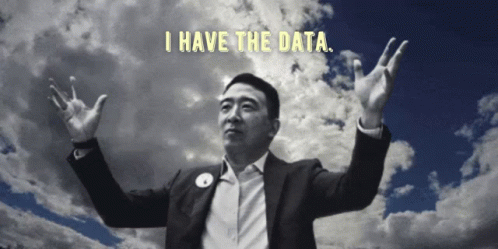
> Dudas, comentarios o sugerencias podéis preguntarme en: pablo.villardelcastillo@gmail.com